In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [4]:
df = pd.read_csv("data/insurance_data.csv")

In [5]:
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [6]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(df[["age", "affordibility"]],df[["bought_insurance"]], test_size=0.2, random_state=25)

In [42]:
X_train_scaled = X_train.copy()
X_train_scaled["age"] = X_train_scaled["age"] / 100

X_test_scaled = X_test.copy()
X_test_scaled["age"] = X_test_scaled["age"] / 100

Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network

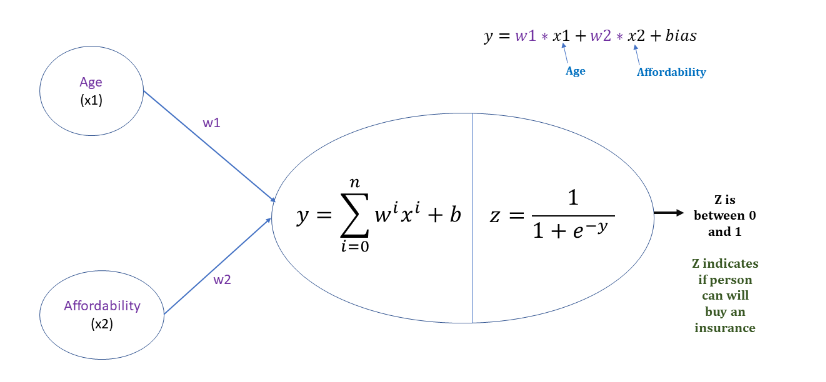

In [43]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(len(X_train.columns), ), activation="sigmoid", kernel_initializer="ones", bias_initializer="zeros")
])
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model.fit(X_train_scaled, Y_train, epochs=1000)

Epoch 1/1000


C:\Users\sujoy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step - accuracy: 0.5000 - loss: 0.7113
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.7110
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.7106
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5000 - loss: 0.7102
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5000 - loss: 0.7098
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - loss: 0.7094
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5000 - loss: 0.7091
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5000 - loss: 0.7087
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5000 - loss: 0.7083
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5000 - loss: 0.7079
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5000 - loss: 0.7076
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - lo

In [11]:
model.evaluate(X_test_scaled, Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.8333 - loss: 0.5276


[0.5275540351867676, 0.8333333134651184]

In [12]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[0.65436006],
       [0.6362884 ],
       [0.6569071 ],
       [0.41346112],
       [0.5494102 ],
       [0.41619965]], dtype=float32)

In [13]:
Y_test

,bought_insurance
9,1
25,1
8,1
21,0
0,0
12,0


In [14]:
coefficients, intercept = model.get_weights()

In [39]:
coefficients, intercept

(array([[1.1281339],
        [0.5930885]], dtype=float32),
 array([-0.6429901], dtype=float32))

This means w1=1.1281339, w2=0.59308857, bias =-0.6429902

In [16]:
import math
def sigmoid(x):
    value = 1 / (1 + math.exp(-x))
    return value
    

In [17]:
sigmoid(10)

0.9999546021312976

Instead of model.predict, write our own prediction function that uses w1,w2 and bias

In [18]:
X_test_scaled

,age,affordibility
9,0.61,1
25,0.54,1
8,0.62,1
21,0.26,0
0,0.22,1
12,0.27,0


In [19]:
Y_test

,bought_insurance
9,1
25,1
8,1
21,0
0,0
12,0


In [20]:
def predict(age, affordibility):
    value = coefficients[0][0]*age + coefficients[1][0]*affordibility + intercept[0]
    return sigmoid(value)

In [21]:
predict(0.26, 0)

0.4134611621712961

Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent

First write couple of helper routines such as sigmoid and log_loss

In [22]:
def sigmoid_array(X):
    return 1 / (1 + np.exp(-X))

In [23]:
sigmoid_array(np.array([10, 5, 1]))

array([0.9999546 , 0.99330715, 0.73105858])

In [24]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i, epsilon) for i in y_predicted]
    y_predicted_new = [min(i, 1 - epsilon) for i in y_predicted]
    y_predicted_new = np.array(y_predicted_new)
    loss =  -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))
    return loss

Now comes the time to implement our final gradient descent function

In [25]:
def gradient_descent(age, affordibility, y_true, epochs, loss_threshold):
    w1 = 1
    w2 = 1
    bias = 0
    learning_rate = 0.05
    n = len(age)

    for x in range(epochs):
        weighted_sum = w1*age + w2*affordibility + bias
        y_predicted = sigmoid_array(weighted_sum)
        loss = log_loss(y_true, y_predicted)
        if loss <= loss_threshold:
            break
        w1d = (1/n)*np.dot(np.transpose(age), (y_predicted - y_true))
        w2d = (1/n)*np.dot(np.transpose(affordibility), (y_predicted - y_true))
        bias_d  = np.mean(y_predicted - y_true)

        w1 = w1 - learning_rate*w1d
        w2 = w2 - learning_rate*w1d
        bias  = bias  - learning_rate*bias_d
        print (f'Epoch:{x}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
    return w1, w2, bias

In [26]:
gradient_descent(X_train_scaled["age"], X_train_scaled["affordibility"], Y_train["bought_insurance"], 1000, 0.6308)

Epoch:0, w1:0.9973689931884728, w2:0.9973689931884728, bias:-0.011748951666770448, loss:0.7428288579142563
Epoch:1, w1:0.9947892313439389, w2:0.9947892313439389, bias:-0.023365514727322435, loss:0.7395877068399134
Epoch:2, w1:0.9922604153450618, w2:0.9922604153450618, bias:-0.034850506137498044, loss:0.7364247598538612
Epoch:3, w1:0.9897822351942104, w2:0.9897822351942104, bias:-0.0462047694118733, loss:0.7333385763249815
Epoch:4, w1:0.9873543704335834, w2:0.9873543704335834, bias:-0.057429173544196924, loss:0.7303277175339158
Epoch:5, w1:0.9849764905633434, w2:0.9849764905633434, bias:-0.06852461192533026, loss:0.7273907479728123
Epoch:6, w1:0.9826482554608948, w2:0.9826482554608948, bias:-0.07949200126081643, loss:0.7245262365953985
Epoch:7, w1:0.9803693158004769, w2:0.9803693158004769, bias:-0.09033228049012237, loss:0.7217327580164152
Epoch:8, w1:0.9781393134722693, w2:0.9781393134722693, bias:-0.1010464097095092, loss:0.7190088936596525
Epoch:9, w1:0.9759578820002475, w2:0.9759578

(0.9196304277851203, 0.9196304277851203, -0.6303139280668368)

In [55]:
class myNN:
    def __init__(self):
        self.w1 = 1
        self.w2 = 1
        self.bias = 0
        self.learning_rate = 0.001
        
    def fit(self, X_train_scaled, Y_train, epochs, loss_threshold):
        w1, w2, bias = self.gradient_descent(X_train_scaled["age"], X_train_scaled["affordibility"], Y_train["bought_insurance"], epochs, loss_threshold)

    def predict(self, X_test_scaled):
        value = self.w1*X_test_scaled["age"] + self.w2*X_test_scaled["affordibility"] + self.bias
        return sigmoid_array(value)
        
    def gradient_descent(self, age, affordibility, y_true, epochs, loss_threshold): 
        n = len(age)
        for x in range(epochs):
            weighted_sum = self.w1*age + self.w2*affordibility  + self.bias
            y_predicted = sigmoid_array(weighted_sum)
            loss = log_loss(y_true, y_predicted)
            if loss <= loss_threshold:
                break
            w1d = (1/n)*np.dot(np.transpose(age), (y_predicted - y_true))
            w2d = (1/n)*np.dot(np.transpose(affordibility), (y_predicted - y_true))
            bias_d  = np.mean(y_predicted - y_true)
    
            self.w1 = self.w1 - self.learning_rate*w1d
            self.w2 = self.w2 - self.learning_rate*w1d
            self.bias  = self.bias  - self.learning_rate*bias_d
            if x%50 == 0:
                print (f'Epoch:{x}, w1:{self.w1}, w2:{self.w2}, bias:{self.bias}, loss:{loss}')
        return self.w1, self.w2, self.bias
        
        

In [56]:
custom_model = myNN()
custom_model.fit(X_train_scaled, Y_train, epochs=1000, loss_threshold=0.4631)


Epoch:0, w1:0.9999498152669404, w2:0.9999498152669404, bias:-0.00022683735472737166, loss:0.7113403233723417
Epoch:50, w1:0.9974662208622456, w2:0.9974662208622456, bias:-0.011503761426975772, loss:0.7084177738287195
Epoch:100, w1:0.9950326936207118, w2:0.9950326936207118, bias:-0.02265391940566264, loss:0.7055657505862052
Epoch:150, w1:0.992648911838372, w2:0.992648911838372, bias:-0.03367818110611295, loss:0.7027829001368643
Epoch:200, w1:0.9903145445678474, w2:0.9903145445678474, bias:-0.04457743767950155, loss:0.7000678745333365
Epoch:250, w1:0.9880292520098285, w2:0.9880292520098285, bias:-0.05535260062437316, loss:0.6974193324220356
Epoch:300, w1:0.9857926859042268, w2:0.9857926859042268, bias:-0.0660046008021546, loss:0.6948359400301853
Epoch:350, w1:0.9836044899203169, w2:0.9836044899203169, bias:-0.07653438745824762, loss:0.6923163721063872
Epoch:400, w1:0.981464300045207, w2:0.981464300045207, bias:-0.08694292725021223, loss:0.6898593128145896
Epoch:450, w1:0.9793717449700258

In [40]:
coefficients, intercept

(array([[1.1281339],
        [0.5930885]], dtype=float32),
 array([-0.6429901], dtype=float32))

In [57]:
custom_model.predict(X_test_scaled)

2     0.769903
10    0.716980
21    0.511715
11    0.736037
14    0.773284
9     0.792832
dtype: float64

In [58]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.64471424],
       [0.5669489 ],
       [0.40433905],
       [0.59435284],
       [0.64985454],
       [0.6799389 ]], dtype=float32)